Notebook setup:

In [1]:
import os
import sys

In [2]:
%load_ext autoreload
#Now, you can turn on auto-reloading
%autoreload 2

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = '/content/drive/MyDrive/Colab_Notebooks/cs3220_A3/A3_p1/src' #@param {type: "string"}
sys.path.append(path)

In [5]:
%matplotlib inline

Testing
---

In [12]:
from MazeMapData import *

In [13]:
mazeData

{'A': {'B': 7},
 'C': {'B': 6},
 'F': {'B': 2, 'E': 4, 'G': 4},
 'D': {'E': 2, 'M': 3},
 'H': {'G': 2, 'N': 3},
 'I': {'E': 2, 'J': 3, 'O': 2},
 'L': {'G': 2, 'K': 3, 'Q': 2},
 'P': {'O': 4, 'Q': 4, 'AD': 6},
 'T': {'O': 2, 'U': 2, 'Y': 2},
 'W': {'Q': 2, 'V': 2, 'Z': 2},
 'X': {'R': 3, 'Y': 2},
 'AA': {'S': 3, 'Z': 2},
 'AC': {'U': 4, 'AB': 4, 'AD': 2},
 'AE': {'V': 4, 'AD': 2, 'AF': 5}}

In [14]:
mazeLocations

{'A': (0, 0),
 'B': (7, 0),
 'C': (13, 0),
 'D': (1, 2),
 'E': (3, 2),
 'F': (7, 2),
 'G': (11, 2),
 'H': (13, 2),
 'I': (3, 4),
 'J': (6, 4),
 'K': (8, 4),
 'L': (11, 4),
 'M': (1, 5),
 'N': (13, 5),
 'O': (3, 6),
 'P': (7, 6),
 'Q': (11, 6),
 'R': (1, 7),
 'S': (13, 7),
 'T': (3, 8),
 'U': (5, 8),
 'V': (9, 8),
 'W': (11, 8),
 'X': (1, 10),
 'Y': (3, 10),
 'Z': (11, 10),
 'AA': (13, 10),
 'AB': (1, 12),
 'AC': (5, 12),
 'AD': (7, 12),
 'AE': (9, 12),
 'AF': (14, 12)}

In [16]:
from graphClass import Graph

mazeGraph = Graph(mazeData)
mazeGraph.nodes()

['AB',
 'B',
 'O',
 'AD',
 'G',
 'Y',
 'T',
 'L',
 'I',
 'K',
 'AE',
 'V',
 'D',
 'Z',
 'C',
 'AA',
 'M',
 'S',
 'P',
 'N',
 'H',
 'AC',
 'J',
 'F',
 'X',
 'W',
 'E',
 'AF',
 'Q',
 'R',
 'A',
 'U']

In [19]:
print(' B :', mazeGraph.get('B'))
print(' E :', mazeGraph.get('E'))
print(' G :', mazeGraph.get('G'))
print(' J :', mazeGraph.get('J'))
print(' K :', mazeGraph.get('K'))
print(' M :', mazeGraph.get('M'))
print(' N :', mazeGraph.get('N'))
print(' O :', mazeGraph.get('O'))
print(' Q :', mazeGraph.get('Q'))
print(' R :', mazeGraph.get('R'))
print(' S :', mazeGraph.get('S'))
print(' U :', mazeGraph.get('U'))
print(' V :', mazeGraph.get('V'))
print(' Y :', mazeGraph.get('Y'))
print(' Z :', mazeGraph.get('Z'))
print('AB :', mazeGraph.get('AB'))
print('AD :', mazeGraph.get('AD'))
print('AF :', mazeGraph.get('AF'))

 B : {'A': 7, 'C': 6, 'F': 2}
 E : {'F': 4, 'D': 2, 'I': 2}
 G : {'F': 4, 'H': 2, 'L': 2}
 J : {'I': 3}
 K : {'L': 3}
 M : {'D': 3}
 N : {'H': 3}
 O : {'I': 2, 'P': 4, 'T': 2}
 Q : {'L': 2, 'P': 4, 'W': 2}
 R : {'X': 3}
 S : {'AA': 3}
 U : {'T': 2, 'AC': 4}
 V : {'W': 2, 'AE': 4}
 Y : {'T': 2, 'X': 2}
 Z : {'W': 2, 'AA': 2}
AB : {'AC': 4}
AD : {'P': 6, 'AC': 2, 'AE': 2}
AF : {'AE': 5}


In [21]:
print(mazeGraph.get('AB','AC'))
print(mazeGraph.get('AB','AF'))

4
None


In [25]:
from mapClass import myMap

mazeMap = myMap(mazeData,mazeLocations)
print(mazeMap.get('A'))
print(mazeMap.get('A','B'))
print(mazeMap.getLocation('B'))

{'B': 7}
7
(7, 0)


In [26]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt

In [28]:
G = nx.Graph(mazeMap.graph_dict)
G.nodes

NodeView(('A', 'C', 'F', 'D', 'H', 'I', 'L', 'P', 'T', 'W', 'X', 'AA', 'AC', 'AE', 'B', 'E', 'G', 'M', 'N', 'J', 'O', 'K', 'Q', 'AD', 'U', 'Y', 'V', 'Z', 'R', 'S', 'AB', 'AF'))

In [33]:
nodes_colors = ['black' for node in mazeMap.graph_dict.keys()]
plt.figure(figsize=(20, 20))

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

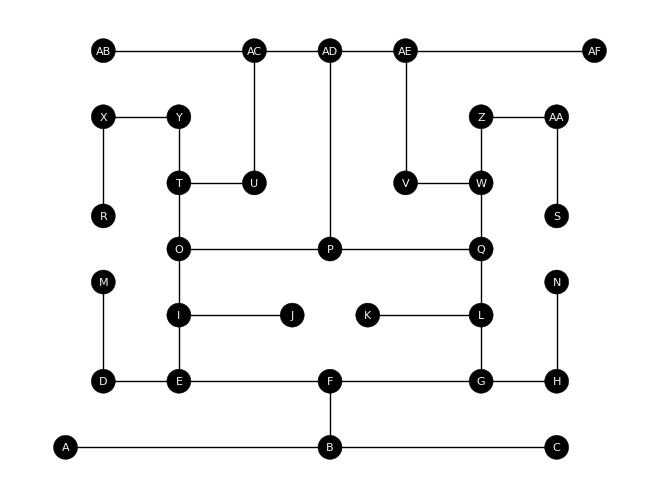

In [55]:
nx.draw(G, pos={k: mazeMap.locations[k] for k in G.nodes()},
            node_color=nodes_colors, linewidths=0.3, edgecolors='k')
node_label_pos = { k:[v[0],v[1]]  for k,v in mazeMap.locations.items() }
node_label_handles = nx.draw_networkx_labels(G, pos=node_label_pos, font_size=8, font_color='whitesmoke')

Task 2
---

In [ ]:
from mazeProblemClass import MazeProblem